# 📊 Análisis Detallado de Entrenamientos
_Notebook generado automáticamente - 2025-08-25_

Este cuaderno está orientado a realizar un análisis exploratorio más profundo de los **entrenamientos**.

## Objetivos principales:
- Analizar cargas físicas por jugador (explosiva, sostenida, regenerativa).
- Identificar jugadores con mayor carga acumulada.
- Visualizar la evolución temporal de los entrenamientos.
- Detectar patrones y posibles riesgos de sobrecarga.


In [1]:
from pathlib import Path
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10,6)})

# Ruta a la base de datos
DB_PATH = Path(r'C:\\Users\\Nico\\Desktop\\DATA SCIENCE\\PP- VOLUNTAREADO\\chivas-ml\\data\\external\\chivas_dw.sqlite')

conn = sqlite3.connect(str(DB_PATH))
df_ent = pd.read_sql('SELECT * FROM DB_Entrenamientos', conn)

# Cargar tabla jugadores
df_jug = pd.read_sql("SELECT * FROM DB_Jugadores", conn)

# Normalizar nombres de columnas
df_jug.columns = df_jug.columns.str.strip().str.lower().str.replace(' ', '_')

# Unir entrenamientos con nombres de jugadores
df_ent = df_ent.merge(df_jug[['id_jugador','nombre','linea']], on='id_jugador', how='left')

df_ent.head()

,id_entrenamiento,id_jugador,Fecha,Distancia_total,HSR_abs_m,HMLD_m,Sprints_distancia_m,Acc_3,Dec_3,Player_Load,...,Carga_Explosiva,Carga_Sostenida,Carga_Regenerativa,Rendimiento_Diario,HSR_rel_m,Sprints_cantidad,Sprints_vel_max_kmh,Velocidad_prom_m_min,nombre,linea
0,1,25,2025-05-23,3294,0,170,0,7,1,49,...,23.5,179.8,1562.0,4.957993,0,0,18.3,92,Roberto Alvarado,Extremo
1,2,25,2025-05-24,3707,138,512,0,8,6,60,...,204.6,524.0,1528.5,20.611742,0,0,22.1,75,Roberto Alvarado,Extremo
2,3,25,2025-05-26,2281,0,284,0,39,22,31,...,172.0,290.2,998.5,9.921122,0,0,20.5,95,Roberto Alvarado,Extremo
3,4,25,2025-05-27,4821,142,638,25,36,27,49,...,350.9,647.8,2020.5,34.234879,0,1,25.5,100,Roberto Alvarado,Extremo
4,5,25,2025-05-28,4523,165,741,54,54,30,70,...,450.0,755.0,1808.5,40.668390,7,3,26.7,51,Roberto Alvarado,Extremo


In [2]:
# Normalizar nombres de columnas y parsear fechas
df_ent.columns = df_ent.columns.str.strip().str.lower().str.replace(' ', '_')

if 'fecha' in df_ent.columns:
    df_ent['fecha'] = pd.to_datetime(df_ent['fecha'], errors='coerce')

df_ent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_entrenamiento      1408 non-null   int64         
 1   id_jugador            1408 non-null   int64         
 2   fecha                 1408 non-null   datetime64[ns]
 3   distancia_total       1408 non-null   int64         
 4   hsr_abs_m             1408 non-null   int64         
 5   hmld_m                1408 non-null   int64         
 6   sprints_distancia_m   1408 non-null   int64         
 7   acc_3                 1408 non-null   int64         
 8   dec_3                 1408 non-null   int64         
 9   player_load           1408 non-null   int64         
 10  rpe                   1408 non-null   int64         
 11  carga_explosiva       1408 non-null   float64       
 12  carga_sostenida       1408 non-null   float64       
 13  carga_regenerativa

## 📈 Estadísticos Descriptivos

In [3]:
df_ent.describe().T

,count,mean,min,25%,50%,75%,max,std
id_entrenamiento,1408.0,704.5,1.0,352.75,704.5,1056.25,1408.0,406.598901
id_jugador,1408.0,17.662642,1.0,11.0,18.0,25.0,30.0,7.901794
fecha,1408,2025-07-02 17:22:09.545454336,2025-05-23 00:00:00,2025-06-11 00:00:00,2025-07-03 00:00:00,2025-07-22 00:00:00,2025-08-18 00:00:00,NaN
distancia_total,1408.0,5177.834517,399.0,3722.0,4855.0,6110.5,12412.0,2231.106823
hsr_abs_m,1408.0,264.034801,0.0,71.75,167.0,331.25,3138.0,336.376533
hmld_m,1408.0,893.606534,9.0,559.0,836.5,1142.25,3418.0,488.559721
sprints_distancia_m,1408.0,84.230114,0.0,8.0,44.0,110.25,1268.0,132.536614
acc_3,1408.0,35.004972,0.0,22.0,33.0,45.0,148.0,19.69463
dec_3,1408.0,35.90483,0.0,23.0,35.0,47.0,152.0,20.066295
player_load,1408.0,83.827415,0.0,57.0,77.0,100.0,2273.0,83.899613


## 👤 Análisis por Jugador

In [4]:
# Promedio de cargas por jugador
cargas_jugador = df_ent.groupby('nombre')[['carga_explosiva','carga_sostenida','carga_regenerativa','rendimiento_diario']].mean()
cargas_jugador.sort_values('carga_explosiva', ascending=False).head(10)

,carga_explosiva,carga_sostenida,carga_regenerativa,rendimiento_diario
nombre,,,,
Armando González,791.471875,1186.528125,1886.640625,48.719287
Gael García,713.726786,1110.800000,2054.214286,44.716108
Miguel Gómez,708.232813,1098.675000,2262.304688,46.778490
Miguel Tapias,674.348837,1174.469767,2309.976744,43.869032
Teun Wilke,627.872727,1029.257576,2067.833333,51.050419
Cade Cowell,606.248438,925.731250,2033.859375,44.793716
Daniel Aguirre,599.378333,923.840000,1980.183333,34.626952
Isaác Brisuela,566.714062,876.687500,1819.093750,40.965622
Bryan González,554.616667,952.906667,1697.850000,37.192847


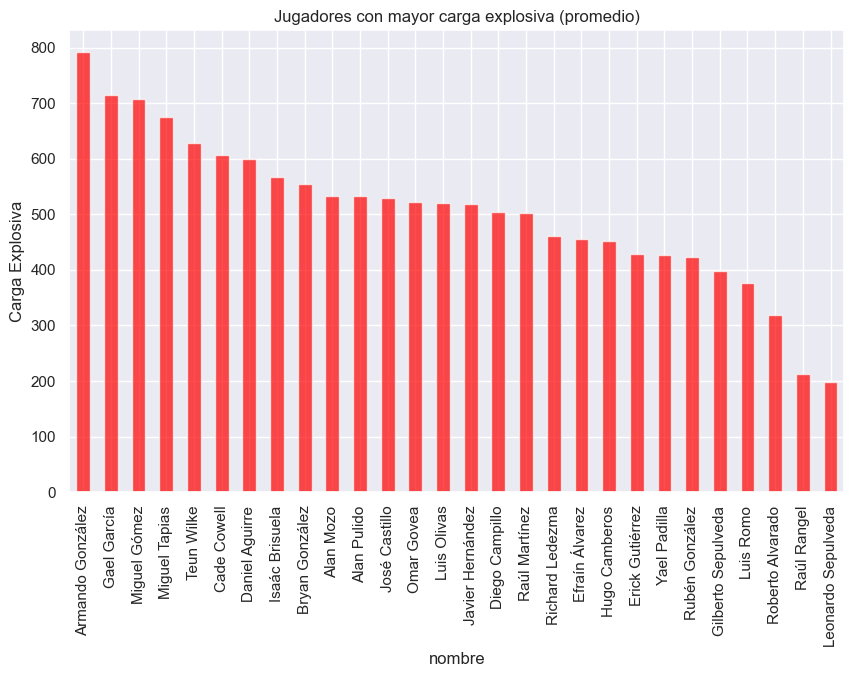

In [5]:
# Visualización: top jugadores con mayor carga explosiva
top_explosiva = cargas_jugador.sort_values('carga_explosiva', ascending=False).head(30)
top_explosiva['carga_explosiva'].plot(kind='bar', color='red', alpha=0.7)
plt.title('Jugadores con mayor carga explosiva (promedio)')
plt.ylabel('Carga Explosiva')
plt.show()

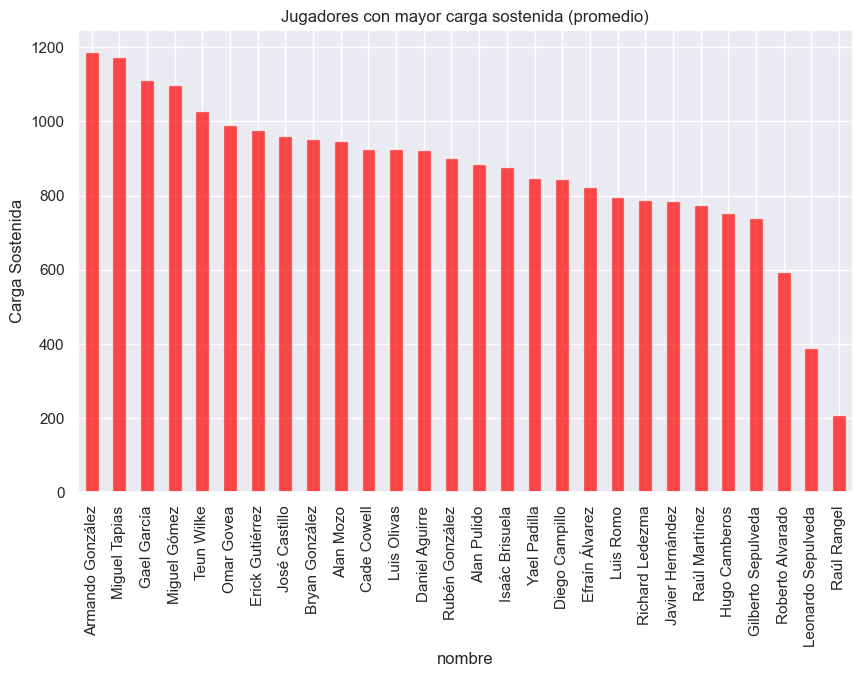

In [6]:
# Visualización: top jugadores con mayor carga Sostenida
top_sostenida = cargas_jugador.sort_values('carga_sostenida', ascending=False).head(30)
top_sostenida['carga_sostenida'].plot(kind='bar', color='red', alpha=0.7)
plt.title('Jugadores con mayor carga sostenida (promedio)')
plt.ylabel('Carga Sostenida')
plt.show()

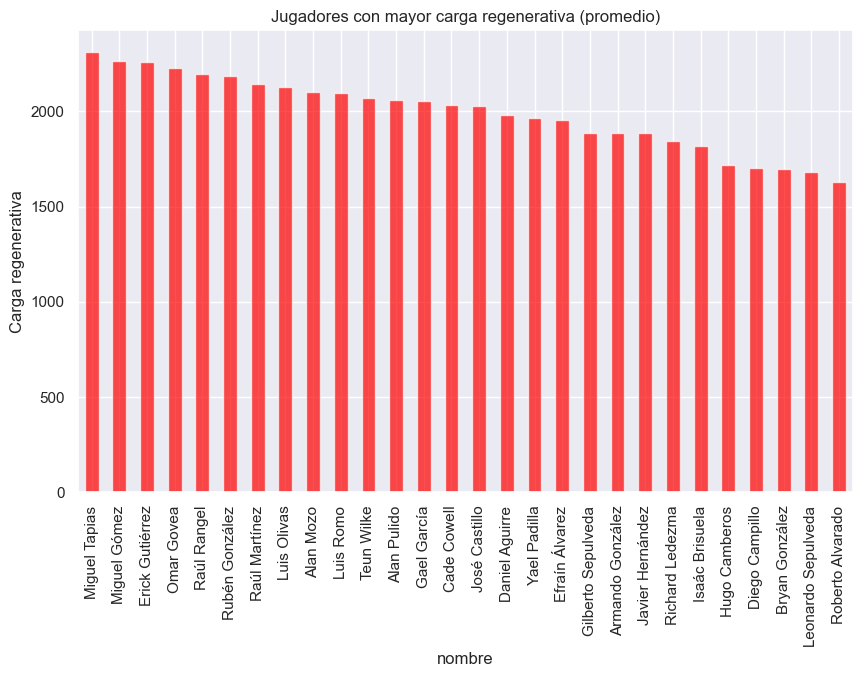

In [7]:
# Visualización: top jugadores con mayor carga Regenerativa
top_regenerativa = cargas_jugador.sort_values('carga_regenerativa', ascending=False).head(30)
top_regenerativa['carga_regenerativa'].plot(kind='bar', color='red', alpha=0.7)
plt.title('Jugadores con mayor carga regenerativa (promedio)')
plt.ylabel('Carga regenerativa')
plt.show()

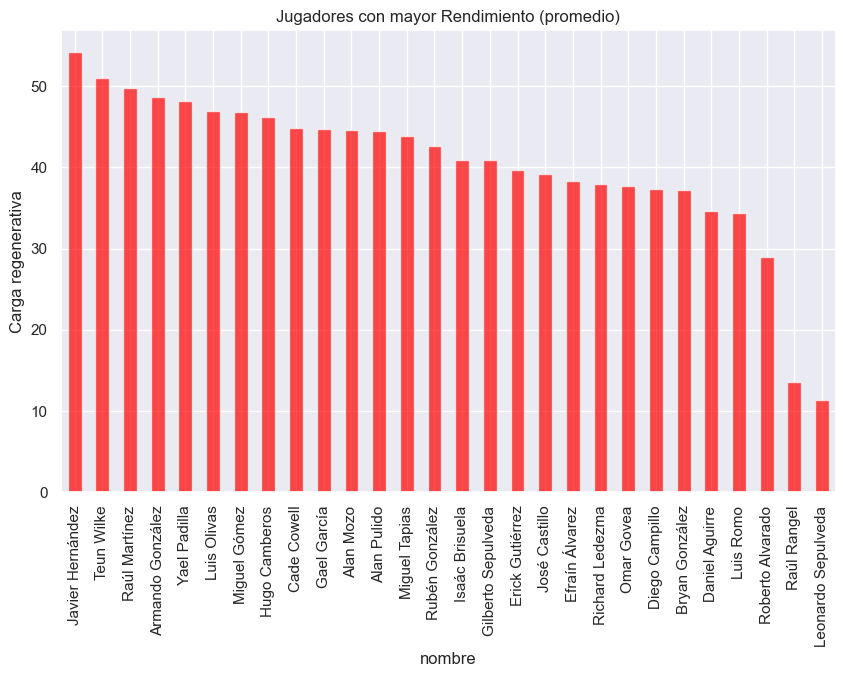

In [8]:
# Visualización: top jugadores con mayor carga Rendimiento diario
top_rendimiento = cargas_jugador.sort_values('rendimiento_diario', ascending=False).head(30)
top_rendimiento['rendimiento_diario'].plot(kind='bar', color='red', alpha=0.7)
plt.title('Jugadores con mayor Rendimiento (promedio)')
plt.ylabel('Carga regenerativa')
plt.show()

In [9]:
# Vamos a visualizar el rendimiento agrupando los datos por las diferentes líneas de jugadores:

df_ent.groupby('linea')[['carga_explosiva','carga_sostenida','carga_regenerativa']].mean()


,carga_explosiva,carga_sostenida,carga_regenerativa
linea,,,
Defensa Central,505.845736,866.521705,2041.974806
Defensa Lateral,591.044279,999.329353,2075.985075
Delantera,653.070849,1029.039114,2003.053506
Extremo,486.300000,797.522293,1825.189490
Medio Defensivo,491.347059,945.932773,2161.481092
Medio Ofensivo,402.172800,821.947200,2028.392000
Portería,213.500000,209.000000,2195.000000


In [10]:
(df_ent.groupby(['linea','nombre'])[['carga_explosiva','carga_sostenida','carga_regenerativa']]
       .mean()
       .reset_index()
       .sort_values(['carga_sostenida'], ascending=[False]))


,linea,nombre,carga_explosiva,carga_sostenida,carga_regenerativa
11,Delantera,Armando González,791.471875,1186.528125,1886.640625
4,Defensa Central,Miguel Tapias,674.348837,1174.469767,2309.976744
12,Delantera,Gael García,713.726786,1110.800000,2054.214286
9,Defensa Lateral,Miguel Gómez,708.232813,1098.675000,2262.304688
14,Delantera,Teun Wilke,627.872727,1029.257576,2067.833333
23,Medio Defensivo,Omar Govea,522.652830,990.324528,2229.415094
22,Medio Defensivo,Erick Gutiérrez,429.235593,977.105085,2256.491525
8,Defensa Lateral,José Castillo,528.931818,960.890909,2029.954545
7,Defensa Lateral,Bryan González,554.616667,952.906667,1697.850000
6,Defensa Lateral,Alan Mozo,532.722222,947.358730,2098.920635


## 📅 Evolución Temporal de Entrenamientos

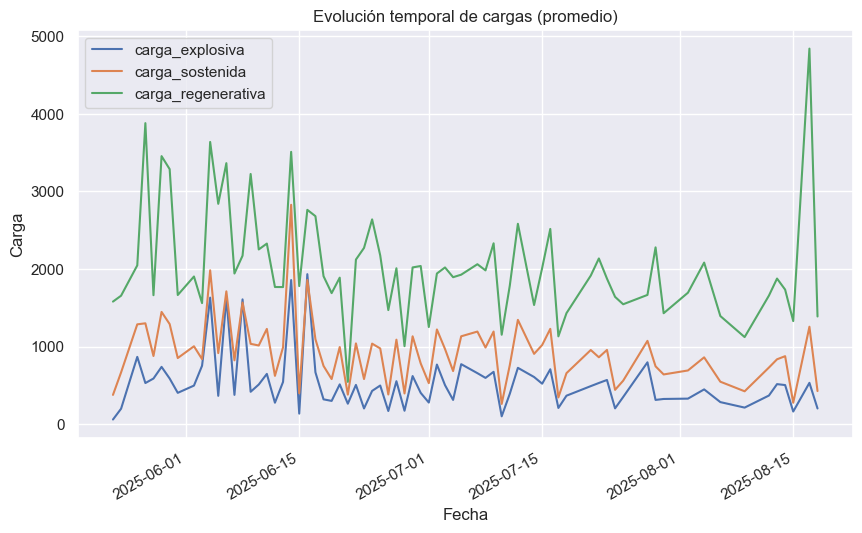

In [11]:
if 'fecha' in df_ent.columns:
    df_time = df_ent.groupby(['fecha'])[['carga_explosiva','carga_sostenida','carga_regenerativa']].mean()
    df_time.plot()
    plt.title('Evolución temporal de cargas (promedio)')
    plt.xlabel('Fecha')
    plt.ylabel('Carga')
    plt.show()

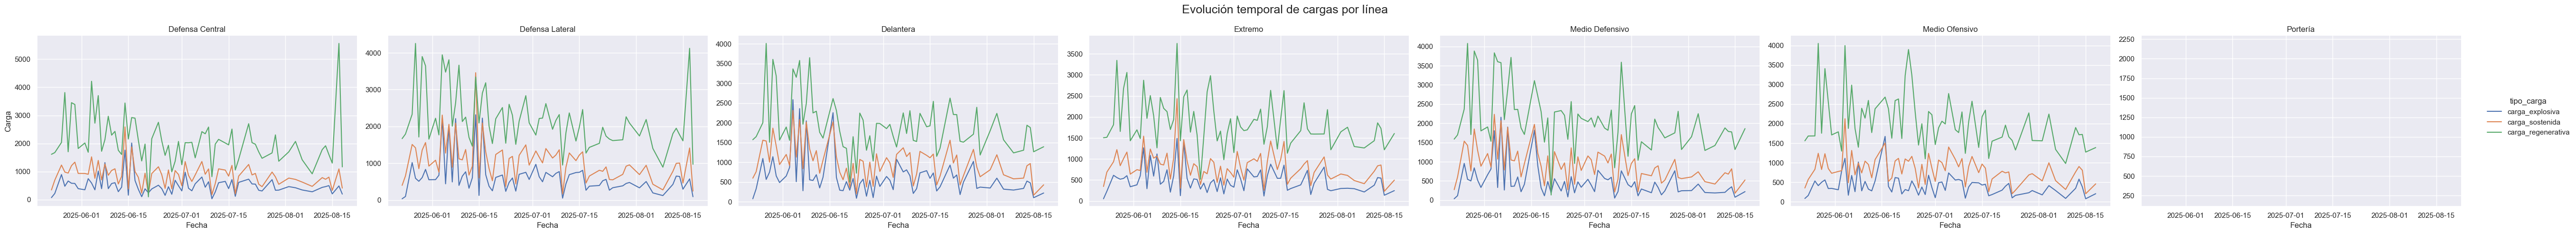

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Promedio por fecha y línea
df_time_linea = (df_ent.groupby(['fecha','linea'])
                 [['carga_explosiva','carga_sostenida','carga_regenerativa']]
                 .mean()
                 .reset_index())

# Promedio por fecha y línea
df_time_linea = (df_ent.groupby(['fecha','linea'])
                 [['carga_explosiva','carga_sostenida','carga_regenerativa']]
                 .mean()
                 .reset_index())

# Pasar a formato largo
df_melt = df_time_linea.melt(
    id_vars=['fecha','linea'],
    value_vars=['carga_explosiva','carga_sostenida','carga_regenerativa'],
    var_name='tipo_carga',
    value_name='valor'
)

# Gráfico: un panel por línea, con todas las cargas
g = sns.relplot(
    data=df_melt,
    x='fecha', y='valor',
    kind='line',
    hue='tipo_carga',    # cada carga con color distinto
    col='linea',         # un panel por línea
    facet_kws={'sharey': False, 'sharex': True},
    height=5, aspect=1.5
)

g.set_titles("{col_name}")
g.set_axis_labels("Fecha", "Carga")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Evolución temporal de cargas por línea", fontsize=18)
plt.show()



### 📌 Conclusión sobre la evolución de cargas

Al observar las gráficas temporales de las distintas líneas, se distinguen dos etapas claras:

- **Junio – Julio (Pretemporada):**  
  Se evidencian fuertes **variaciones en la intensidad** de los entrenamientos. Esto responde a la lógica de la preparación física previa al campeonato, donde se alternan sesiones de alta exigencia (picos de carga explosiva y sostenida) con sesiones regenerativas, buscando construir la base aeróbica y anaeróbica del plantel.

- **Agosto en adelante (Campeonato):**  
  A partir del inicio de la competencia oficial, las cargas se vuelven **más estables y controladas**. La variabilidad disminuye y las curvas se suavizan, mostrando un plan de entrenamiento enfocado en:
  - **Mantener** el nivel físico alcanzado en pretemporada.  
  - **Evitar sobrecargas** que afecten el rendimiento en los partidos.  
  - **Priorizar la recuperación** para sostener la performance a lo largo del calendario competitivo. 

- **Defensas can carga más liviana, delanteros con picos pronunciados:**
    Defensas centrales y laterales tienen menos carga explosiva que extremos y delanteros.
    Extremos y delanteros presentan más picos → consistente con su rol.

- **Anomalías el 15 de Agosto:**
    Se visualiza en aumento significativo en las cargas de Defensa lLateral y Defensa Central (picos que llegan a 5000). El paso a seguír va a ser estudiar esta fecha para ver si hubo un aumento real o una medición erronea del equipo).

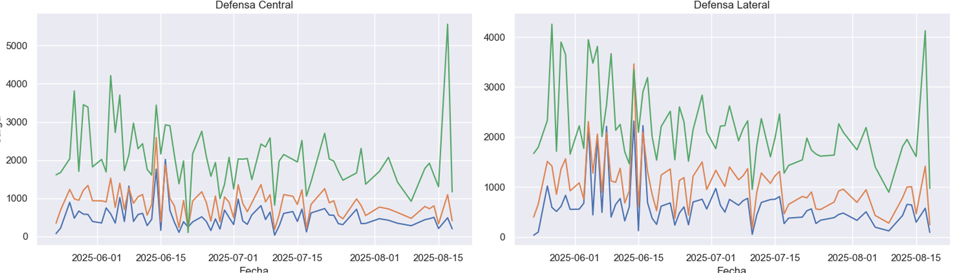


✅ En síntesis, el cambio en los patrones de carga refleja la **transición de la preparación a la competencia**, donde la estrategia física pasa de “construir” a “conservar” el rendimiento.


In [13]:
# Vamos a evaluar esos picos detectados en agosto: 
# Suponiendo que tu dataframe se llama df_entrenos
fecha_objetivo = "2025-08-15"

df_pico = df_ent[df_ent["fecha"] == fecha_objetivo]

df_pico = df_pico[[
    "nombre", "linea", "fecha",
    "distancia_total", "hsr_abs_m", "hmld_m",
    "sprints_cantidad", "acc_3", "dec_3",
    "carga_explosiva", "carga_sostenida", "carga_regenerativa","rendimiento_diario"
]]

df_pico.sort_values("carga_regenerativa", ascending=False)


,nombre,linea,fecha,distancia_total,hsr_abs_m,hmld_m,sprints_cantidad,acc_3,dec_3,carga_explosiva,carga_sostenida,carga_regenerativa,rendimiento_diario
1296,Miguel Gómez,Defensa Lateral,2025-08-15,6147,384,1013,11,38,39,727.3,1030.4,2375.0,52.190748
1259,Raúl Martínez,Defensa Central,2025-08-15,5612,298,901,7,46,18,575.6,922.8,2206.5,66.980079
1334,Cade Cowell,Extremo,2025-08-15,3165,0,78,0,5,3,22.5,86.0,1543.5,3.319292
1382,Richard Ledezma,Extremo,2025-08-15,3336,110,337,2,13,6,196.0,349.2,1444.5,7.908892
1288,José Castillo,Defensa Lateral,2025-08-15,3036,7,169,0,8,9,54.9,180.0,1430.0,1.555803
1311,Alan Pulido,Delantera,2025-08-15,2953,0,112,0,2,6,21.0,112.0,1420.5,1.388477
1341,Daniel Aguirre,Medio Defensivo,2025-08-15,2946,13,178,0,11,4,58.6,189.2,1377.5,0.836881
1390,Rubén González,Medio Defensivo,2025-08-15,2827,20,75,1,4,4,51.0,82.6,1366.0,1.393543
1281,Bryan González,Defensa Lateral,2025-08-15,3227,149,378,5,12,15,277.3,389.0,1350.0,9.546484
1406,Yael Padilla,Medio Ofensivo,2025-08-15,2903,47,216,1,9,6,103.4,226.0,1320.0,2.720563


### 📌 Conclusión respecto al análisis del día 15/08/2025

Al observar los datos podemos determinar lo siguiente:

- **Defensas con una distancia_total elevada:**  
  Se estima que tanto Miguel Gómez (Defensa Lateral) como Raúl Martinez (Defensa Central) recorrieron una distancia total muy superior al resto, sin embargo fue con una carga liviana (trote suave). Seguramente se les realizón un entrenamiento de recuperación tras un partido. En este caso me contactaré con el PF para consultar sobre este día en específico.

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ====== Config ======
df = df_ent.copy()

linea_order = [
    "Defensa Central", "Defensa Lateral",
    "Medio Defensivo", "Medio Ofensivo",
    "Extremo", "Delantera"
]

metricas = [
    ("carga_explosiva", "Carga Explosiva"),
    ("carga_sostenida", "Carga Sostenida"),
    ("carga_regenerativa", "Carga Regenerativa"),
    ("rendimiento_diario", "Rendimiento Diario"),
]

# --- Validación mínima
cols_min = {"nombre", "linea"} | {m[0] for m in metricas}
faltan = cols_min - set(df.columns)
if faltan:
    raise ValueError(f"Faltan columnas en df_entrenos: {faltan}")

# --- Limpieza y orden
# 1) normalizar nombres (evita desfasajes por espacios invisibles)
df["nombre"] = (
    df["nombre"].astype(str)
      .str.strip()
      .str.replace(r"\s+", " ", regex=True)
)

# 2) ordenar por línea y nombre
df["linea"] = pd.Categorical(df["linea"], categories=linea_order, ordered=True)
df = df.sort_values(["linea", "nombre"])

# 3) orden único de jugadores y fijarlo como categoría (Seaborn lo sigue al pie de la letra)
orden_jugadores = df["nombre"].drop_duplicates().tolist()
df["nombre"] = pd.Categorical(df["nombre"], categories=orden_jugadores, ordered=True)

# --- Estilo
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", n_colors=len(linea_order))

# ====== Plot helper ======
def boxplot_metric(metric_col, title):
    plt.figure(figsize=(22, 9))

    ax = sns.boxplot(
        data=df,
        x="nombre",
        y=metric_col,
        hue="linea",
        order=orden_jugadores,     # orden fijo
        hue_order=linea_order,
        palette=palette,
        dodge=False,               # <-- evita separar por hue (caja centrada)
        width=0.65,                # <-- ancho razonable (0.6–0.8)
        fliersize=10,
        linewidth=1.2
    )

    ax.set_title(title + " (coloreado por línea)", fontsize=20, weight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Valor")

    # ticks exactamente bajo cada caja
    ax.set_xticks(range(len(orden_jugadores)))
    ax.set_xticklabels(orden_jugadores, rotation=75, ha="right", fontsize=20)

    sns.despine()
    ax.legend(title="Línea", bbox_to_anchor=(1.01, 1), loc="upper left", borderaxespad=0.)
    plt.tight_layout()
    plt.show()



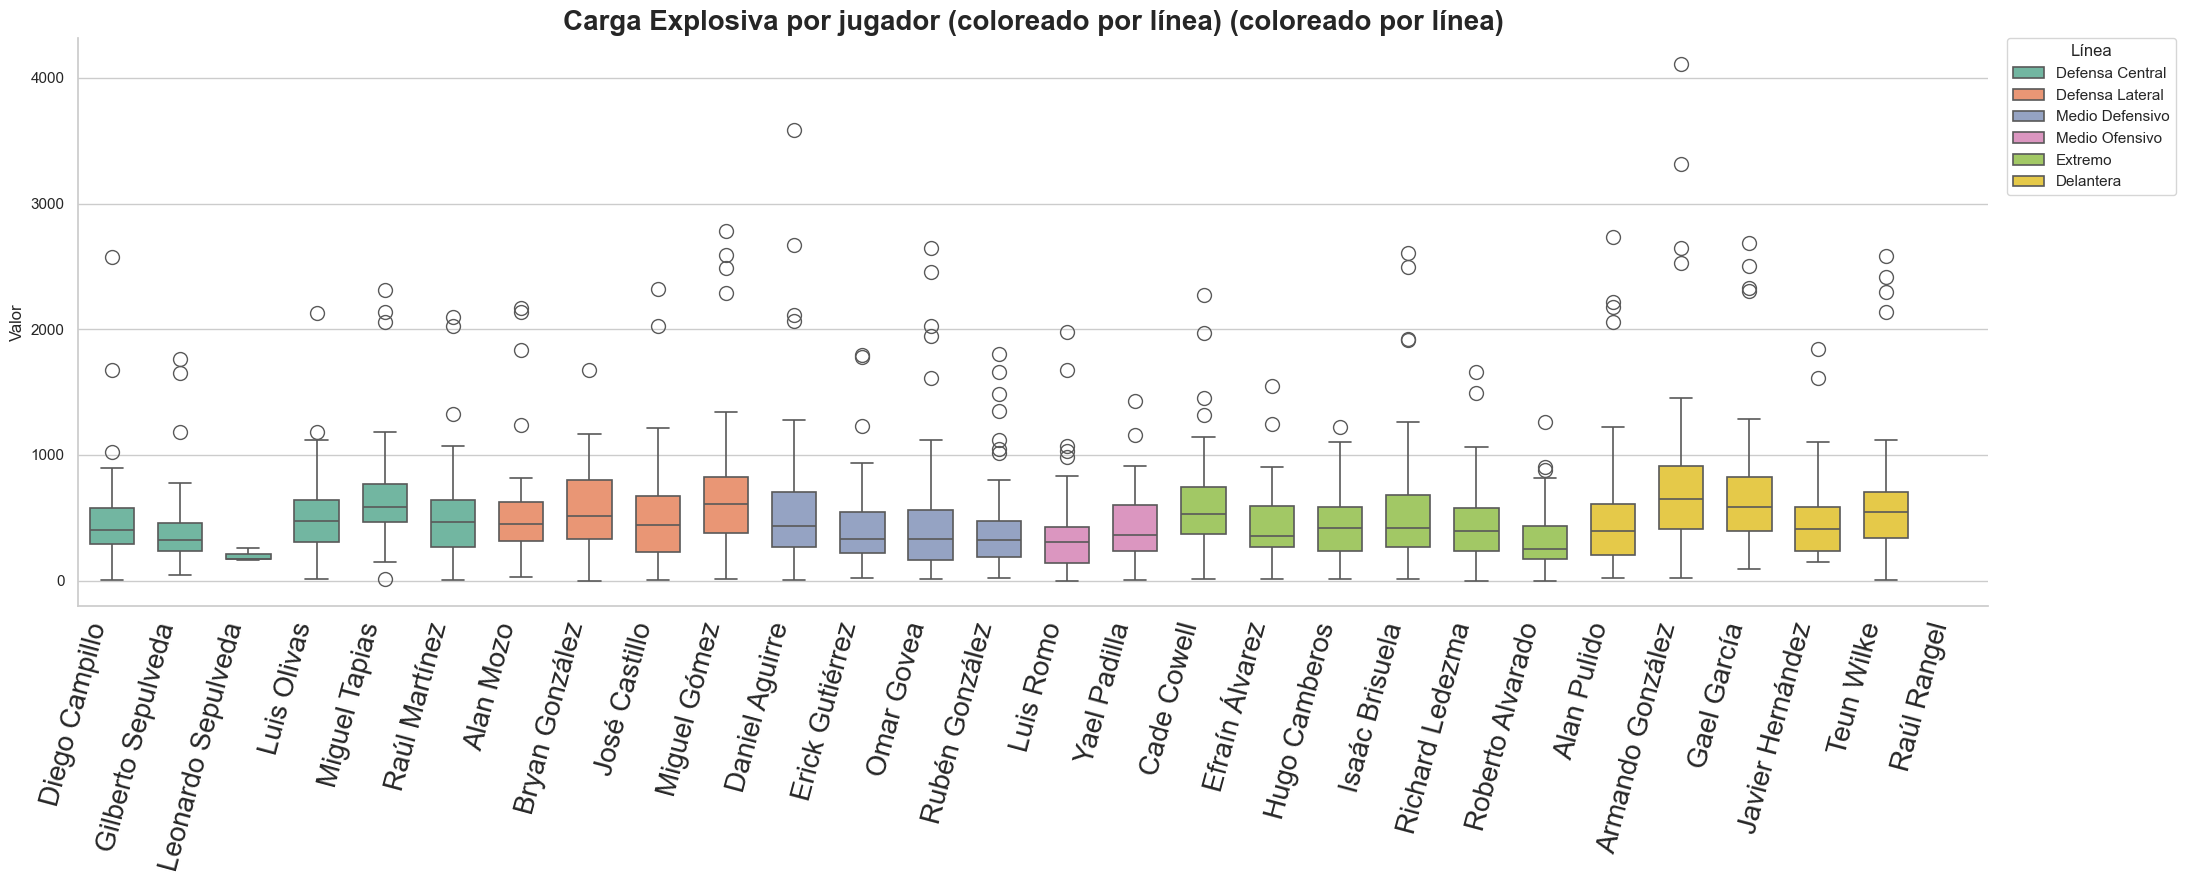

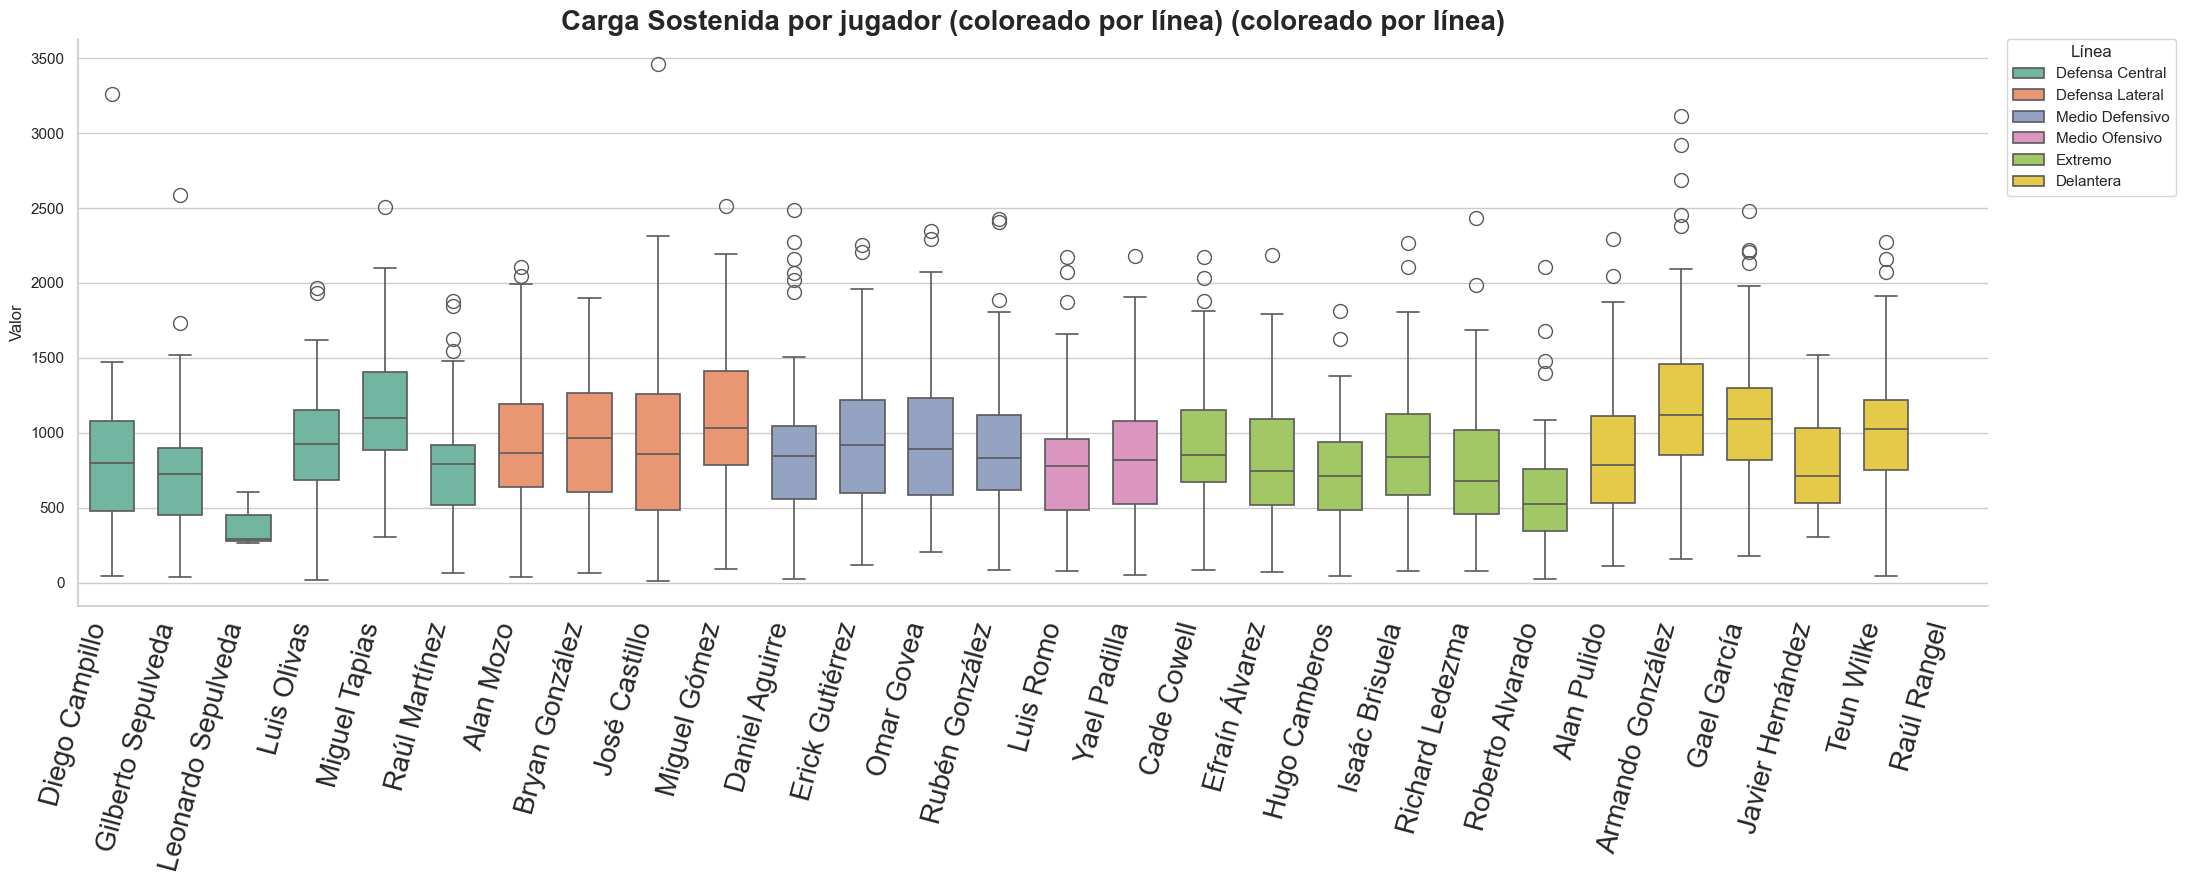

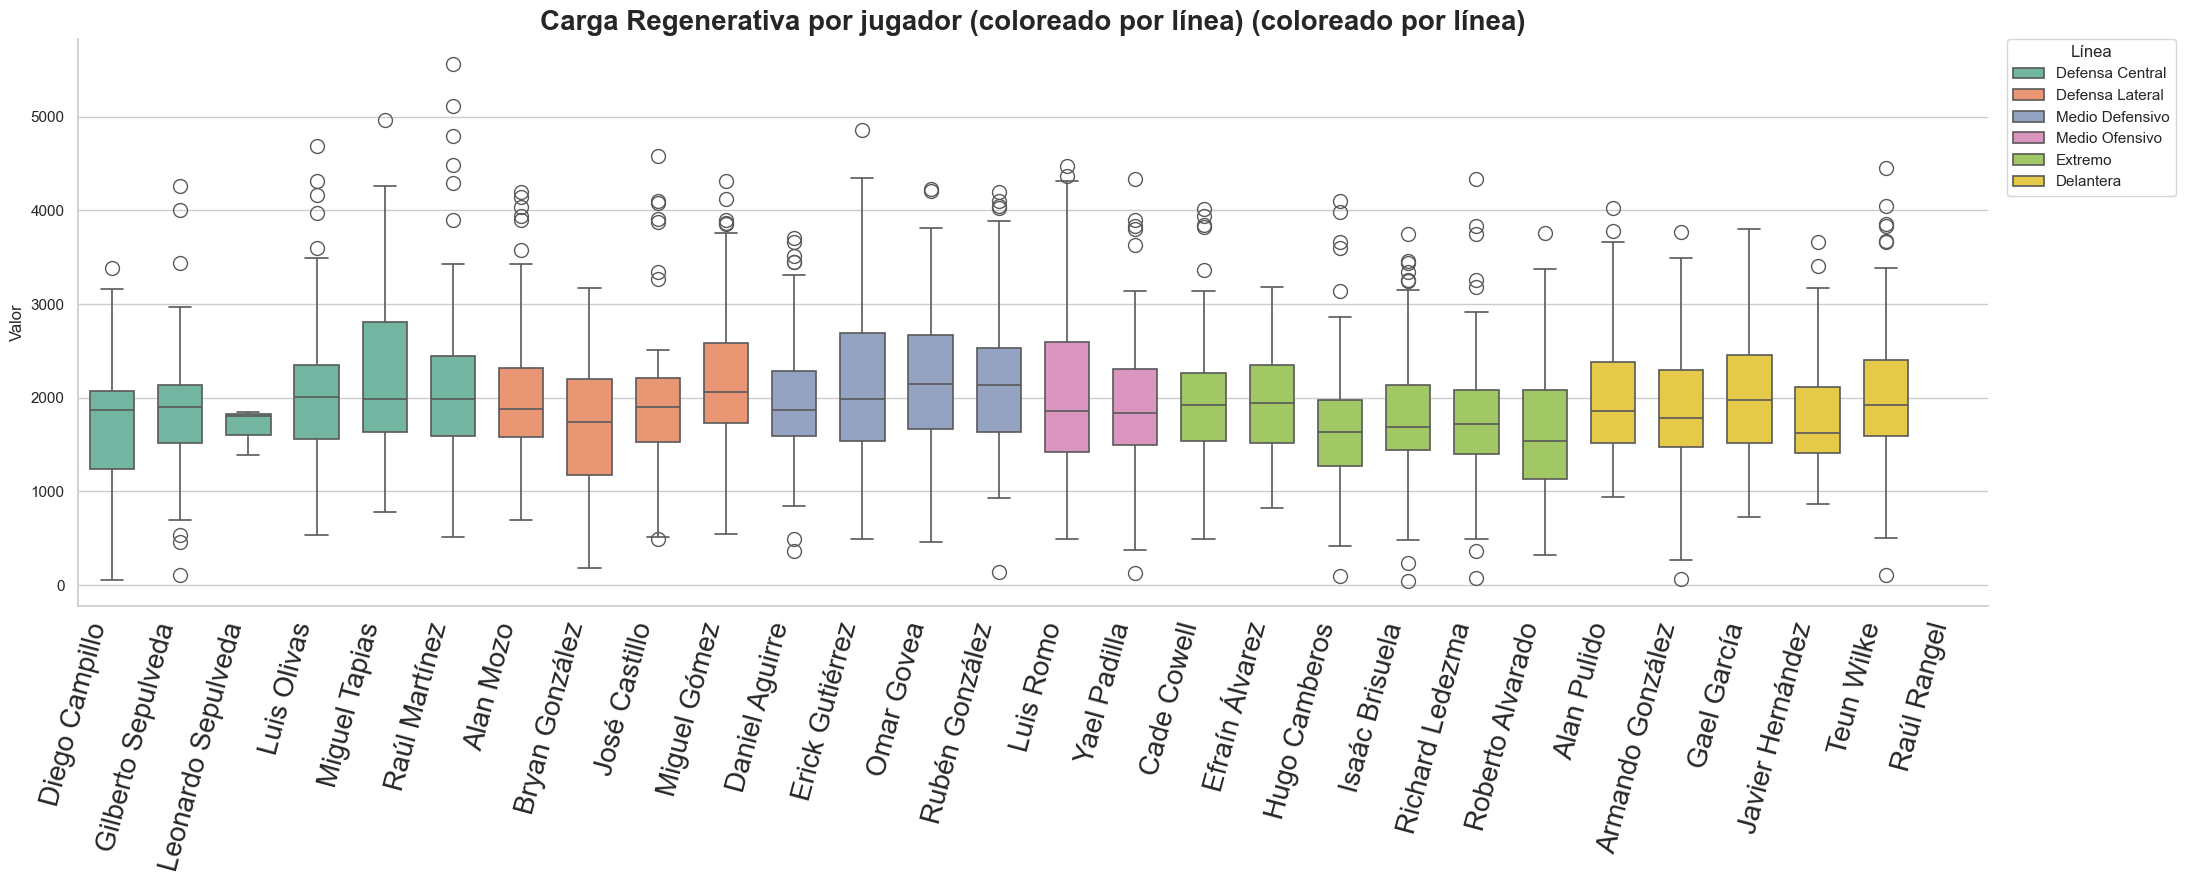

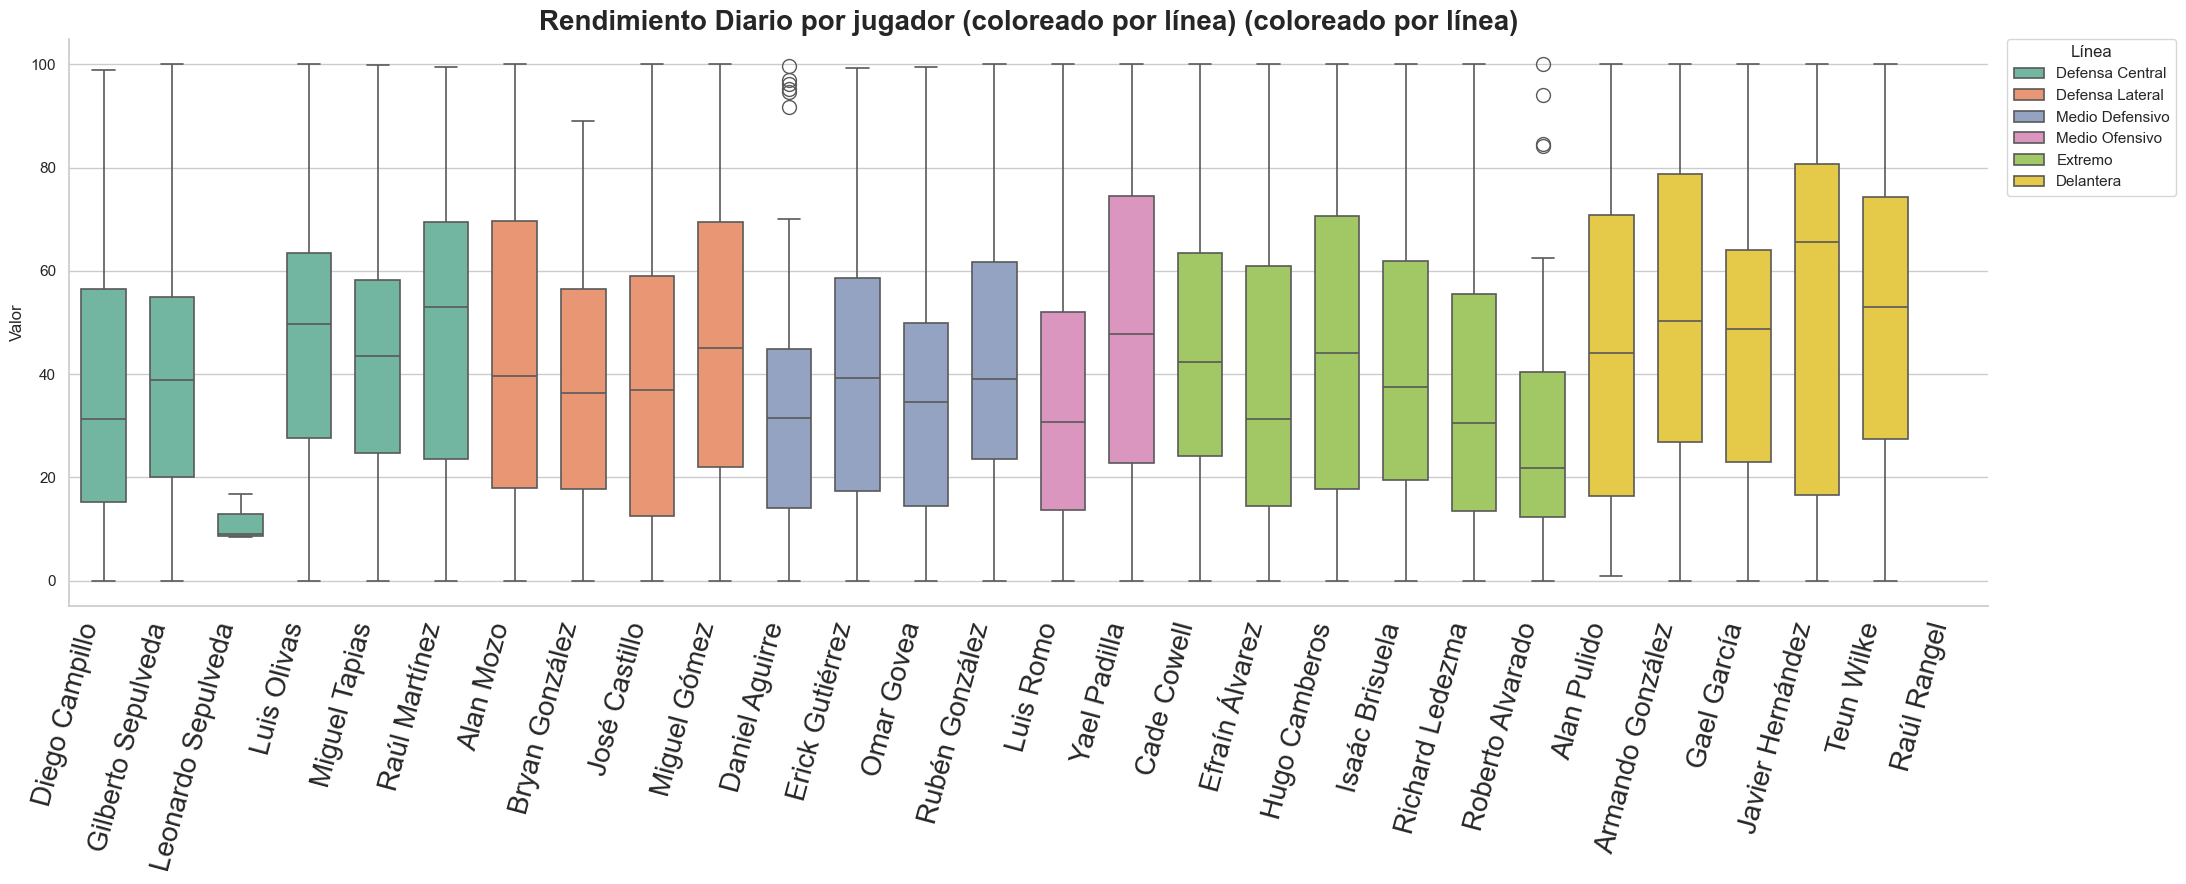

In [41]:
# === Dibujar las 4 figuras, una por métrica ===
for col, titulo in metricas:
    boxplot_metric(col, f"{titulo} por jugador (coloreado por línea)")


In [16]:
import numpy as np
import pandas as pd

# 1) calcula shares + métricas numéricas (igual que antes)
def add_carga_shares(df, ce_col="carga_explosiva", cs_col="carga_sostenida", cr_col="carga_regenerativa"):
    df = df.copy()
    for c in [ce_col, cs_col, cr_col]:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0.0)
    total = (df[ce_col] + df[cs_col] + df[cr_col]).replace(0, np.nan)
    df["share_ce"] = (df[ce_col] / total * 100).fillna(0.0)
    df["share_cs"] = (df[cs_col] / total * 100).fillna(0.0)
    df["share_cr"] = (df[cr_col] / total * 100).fillna(0.0)
    return df

def resumen_numerico_por_jugador(df, nombre_col="Nombre", linea_col="Linea"):
    keep = [c for c in [nombre_col, linea_col] if c in df.columns]
    out = (df.groupby(keep, dropna=False)
             .agg(share_ce=("share_ce","mean"),
                  share_cs=("share_cs","mean"),
                  share_cr=("share_cr","mean"),
                  intensidad_num=("rendimiento_diario","median"),
                  iqr_num=("rendimiento_diario", lambda x: x.quantile(0.75)-x.quantile(0.25)))
             .reset_index())
    return out

# 2) convierte a cualitativo con percentiles del grupo
def etiquetar_cualitativo(res):
    res = res.copy()

    # Intensidad (mediana del rendimiento)
    p_low, p_high = np.nanpercentile(res["intensidad_num"], [33, 66])
    def label_int(x):
        if np.isnan(x):                return "—"
        if x < p_low:                  return "Baja"
        if x <= p_high:                return "Media"
        return "Alta"

    # Consistencia (IQR: menor = más consistente)
    q1, q2, q3 = np.nanpercentile(res["iqr_num"], [25, 50, 75])
    def label_cons(x):
        if np.isnan(x):  return "—"
        if x <= q1:      return "Muy consistente"
        if x <= q2:      return "Consistente"
        if x <= q3:      return "Variable"
        return "Volátil"
    
    res["intensidad"]  = res["intensidad_num"].map(label_int)
    res["consistencia"] = res["iqr_num"].map(label_cons)

    # redondeos y limpieza visibles
    res[["share_ce","share_cs","share_cr"]] = res[["share_ce","share_cs","share_cr"]].round(1)

    # quita columnas numéricas si no querés mostrarlas
    return res.drop(columns=["intensidad_num","iqr_num"])

# 3) perfil de carga (sigue igual, con %)
def clasificar_perfil(row):
    ce, cs, cr = row["share_ce"], row["share_cs"], row["share_cr"]
    if ce >= 20 and ce == max(ce, cs, cr): return "Explosivo"
    if cs >= 30 and cs == max(ce, cs, cr): return "Sostenido"
    if cr >= 60:                           return "Regenerativo"
    if max(ce, cs, cr) < 50 and (max(ce, cs, cr)-min(ce, cs, cr)) <= 15:
        return "Equilibrado"
    return {ce:"Explosivo", cs:"Sostenido", cr:"Regenerativo"}[max(ce, cs, cr)]

# ===== Uso =====
df_ent_sh = add_carga_shares(df_ent)  # tu dataframe de entrenos
res_num   = resumen_numerico_por_jugador(df_ent_sh, nombre_col="nombre", linea_col="linea")
res_qual  = etiquetar_cualitativo(res_num)
res_qual["Perfil"] = res_qual.apply(clasificar_perfil, axis=1)

# orden opcional de columnas y ejemplo de vista
cols = ["nombre","linea","intensidad","consistencia","share_ce","share_cs","share_cr"]
res_final = res_qual[cols]
display(res_final.sort_values(["linea","nombre"]).head(30))


,nombre,linea,intensidad,consistencia,share_ce,share_cs,share_cr
6,Diego Campillo,Defensa Central,Baja,Consistente,14.9,26.2,58.9
10,Gilberto Sepulveda,Defensa Central,Media,Muy consistente,12.8,23.3,63.9
15,Leonardo Sepulveda,Defensa Central,Baja,Muy consistente,9.1,16.7,74.2
16,Luis Olivas,Defensa Central,Alta,Consistente,13.7,24.8,61.5
19,Miguel Tapias,Defensa Central,Media,Muy consistente,15.6,28.1,56.3
21,Raúl Martínez,Defensa Central,Alta,Variable,13.9,22.4,63.7
0,Alan Mozo,Defensa Lateral,Media,Volátil,13.9,25.8,60.3
3,Bryan González,Defensa Lateral,Media,Consistente,16.0,28.8,55.2
14,José Castillo,Defensa Lateral,Media,Variable,13.3,25.4,61.3
18,Miguel Gómez,Defensa Lateral,Alta,Volátil,15.8,26.4,57.8


In [50]:
#Podríamos comparar el entrenamiento de un jugador con un entrenamiento volatil y una intensidad alta 
# como el de Javier Hernandez contra el entrenamiento de Roberto Alvarado, un extremo que muestra un 
# entrenamiento con intensidad baja y un tipo de entrenamiento coy conistente

df_javier_hernandez= df_ent[df_ent['nombre'] == 'Javier Hernández']
df_roberto_alvarado= df_ent[df_ent['nombre'] == 'Roberto Alvarado']



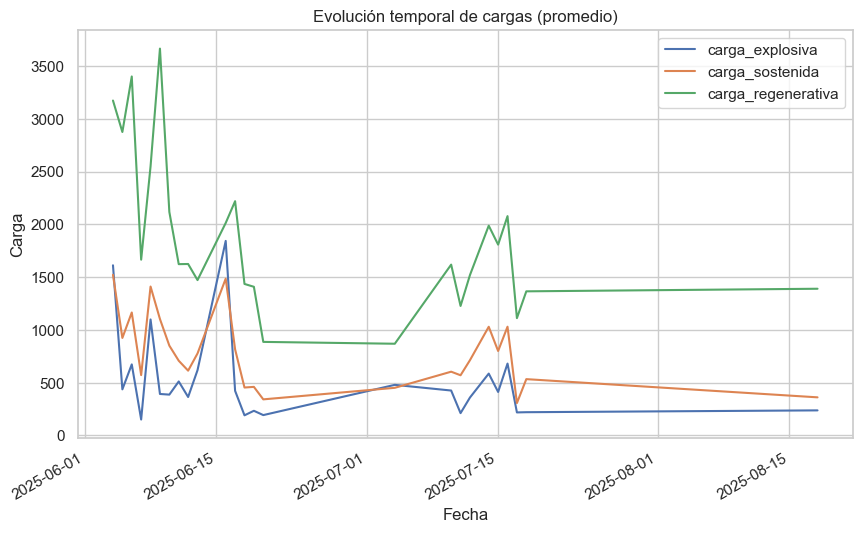

In [51]:
if 'fecha' in df_javier_hernandez.columns:
    df_time = df_javier_hernandez.groupby(['fecha'])[['carga_explosiva','carga_sostenida','carga_regenerativa']].mean()
    df_time.plot()
    plt.title('Evolución temporal de cargas (promedio)')
    plt.xlabel('Fecha')
    plt.ylabel('Carga')
    plt.show()

In [ ]:
# Podemos observar pico elevados y mesetas donde no hay grandes modificacione. Esto nos puede indicar que 
# en estas fechas este jugador pudo no haber entrenado o faltan datos para hacer una estimaión precisa.
# Vamos a analizar los datos de este jugador en particular: 

df_javier_hernandez

,id_entrenamiento,id_jugador,fecha,distancia_total,hsr_abs_m,hmld_m,sprints_distancia_m,acc_3,dec_3,player_load,...,carga_explosiva,carga_sostenida,carga_regenerativa,rendimiento_diario,hsr_rel_m,sprints_cantidad,sprints_vel_max_kmh,velocidad_prom_m_min,nombre,linea
774,775,24,2025-06-04,9024,1156,1522,0,50,30,0,...,1612.2,1522.0,3173.0,100.000000,0,0,23.6,94,Javier Hernández,Delantera
775,776,24,2025-06-05,6763,89,924,33,50,66,0,...,436.8,924.0,2875.0,78.311816,11,3,26.1,57,Javier Hernández,Delantera
776,777,24,2025-06-06,8391,424,1165,34,29,25,0,...,673.3,1165.0,3401.0,100.000000,11,3,25.8,104,Javier Hernández,Delantera
777,778,24,2025-06-07,3911,8,572,0,23,29,0,...,151.1,572.0,1665.5,21.631208,0,0,22.3,73,Javier Hernández,Delantera
778,779,24,2025-06-08,7249,740,1411,208,37,28,0,...,1099.0,1411.0,2549.0,100.000000,62,6,26.3,49,Javier Hernández,Delantera
779,780,24,2025-06-09,8561,128,1103,0,44,43,1,...,393.1,1103.2,3665.0,74.108456,0,0,23.2,54,Javier Hernández,Delantera
780,781,24,2025-06-10,5261,175,851,71,29,26,0,...,387.0,851.0,2117.5,73.521717,30,5,27.5,59,Javier Hernández,Delantera
781,782,24,2025-06-11,4217,263,708,142,27,30,0,...,511.6,708.0,1623.0,65.519609,95,8,28.1,81,Javier Hernández,Delantera
782,783,24,2025-06-12,3965,102,614,7,39,48,0,...,364.4,614.0,1624.5,41.698904,0,1,24.4,50,Javier Hernández,Delantera
783,784,24,2025-06-13,4089,368,777,216,24,26,0,...,618.6,777.0,1472.0,80.683963,163,8,31.6,112,Javier Hernández,Delantera


### Como podemos observar, este jugador entrenó pocos días como para poder hacer un análisis completo de rendimiento. Sin embargo, en los días que entrenó, como se refleja en la tabla y en el gráfico de belas, Jvier Hernández presenta un rendimiento intenso donde se visualizan picos elevados de carga explosiva acercándose a los picos de carga sostenida. 

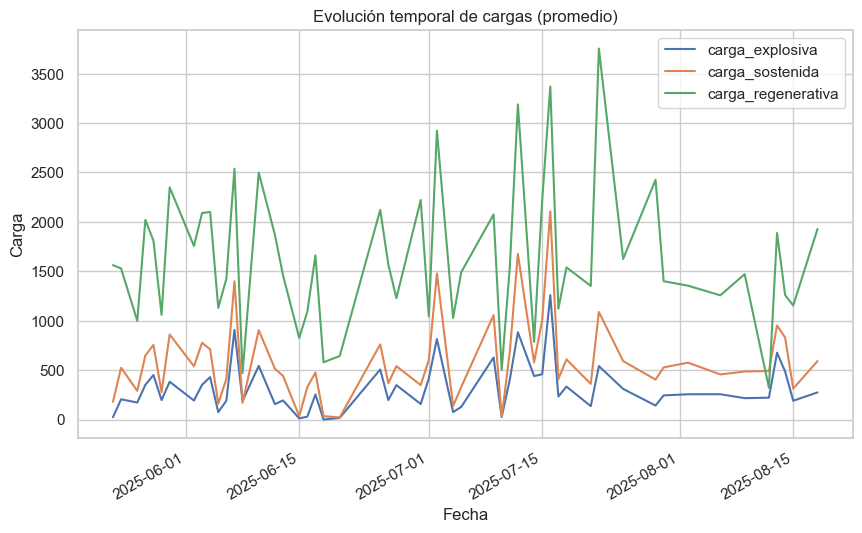

In [ ]:
#Continuamos con Roberto Alarado:

if 'fecha' in df_roberto_alvarado.columns:
    df_time = df_roberto_alvarado.groupby(['fecha'])[['carga_explosiva','carga_sostenida','carga_regenerativa']].mean()
    df_time.plot()
    plt.title('Evolución temporal de cargas (promedio)')
    plt.xlabel('Fecha')
    plt.ylabel('Carga')
    plt.show()

### Podemos observar que este jugador si realizó un entrenamiento constante. Se pueden visualizar los entrenamientos donde realizó los picos máximos (outleiers) que se visualizan en el gráfico de belas y luego un rendimiento consistente sin grandes variaciones de intensidad.



## 📌 Conclusión del análisis de entrenamientos

### En esta primera etapa logramos visualizar el tipo de entrenamiento realizado por las diferentes líneas del equipo, los patrones de carga de cada jugador y la aparición de outliers que podrían señalar riesgos de sobrecarga o lesión.

### Patrones por línea: los delanteros destacan con cargas más altas y entrenamientos volátiles, mientras que los defensores centrales tienden a tener sesiones más estables y de menor intensidad. Esto refleja las demandas específicas de cada posición.

### Patrones individuales: algunos jugadores presentan alta consistencia en su rendimiento, mientras que otros muestran comportamientos más variables. Estas diferencias permiten identificar perfiles individuales que pueden ser útiles para la planificación personalizada.

### Outliers relevantes: se identificaron picos atípicos (ej. 15/08 en defensores), que sugieren entrenamientos regenerativos o posibles registros anómalos. Estos casos merecen revisión puntual con el PF.

### Limitaciones actuales: todavía no hay suficientes datos en algunos jugadores para definir un estilo de entrenamiento estable. A medida que se incorporen más sesiones en los próximos meses, el análisis será más robusto y representativo.

## 📊 Síntesis final práctica:
### Se creó una tabla que resume intensidad, consistencia y la distribución porcentual de cargas (explosiva, sostenida y regenerativa). Esta herramienta le brinda al preparador físico una mirada rápida y cualitativa del comportamiento de cada jugador, facilitando la detección de perfiles, la comparación entre líneas y la toma de decisiones sobre la planificación de cargas.